# Bike Sharing Assingment

### Problem Statement
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

The company wants to know —


- Which variables are significant in predicting the demand for shared bikes.


- How well those variables describe the bike demands
s.e profits.


### Business Goal
1. Assessing Post-Quarantine Shared Bike Demand:  
   To evaluate the anticipated demand for shared bikes once the ongoing COVID-19 quarantine ends nationwide.

2. Identifying Key Revenue Factors: 
   To determine the significant variables that influence the revenue from shared bike usage, and to understand which factors are most predictive of bike demand.

3. Evaluating Model Accuracy:  
   To assess how accurately the selected variables explain and predict the demand for shared bike demands.


## Step 1: Reading and Understanding the Data

Let us first import the libraries and read the dataset.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score


In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# read the data set
df_bike = pd.read_csv('day.csv')

In [4]:
df_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# checking the shape of dataframe
df_bike.shape

(730, 16)

In [6]:
df_bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
df_bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

###  Data Cleaning / Manipulation


In [10]:
# checking null values in column
df_bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Insight:
We can see there are no null values in the columns.

### As per data dictionary , we need to manipulate our data:

In [13]:
# Converting feature values of season column into categorical string values as 1: spring ,2: summer ,3: fall, 4: winter
df_bike['season'] = df_bike['season'].map({1 : 'spring' , 2 : 'summer' , 3 : 'fall' , 4 : 'winter'})

In [14]:
# Converting feature values of mnth column into categorical string values as month name
df_bike['mnth'] = df_bike['mnth'].map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [15]:
# Converting feature values of weekday column into categorical string values as month name.
df_bike['weekday'] = df_bike['weekday'].map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thur',5:'fri',6:'sat'})

In [16]:
# Converting feature values of weathersit column into categorical string values as 
#1: A(clear) 
#2: B(mist & cloudy) 
#3: C(light snow) 
#4:D( heavy rain)
df_bike['weathersit'] = df_bike['weathersit'].map({1: 'A', 2: 'B' , 3: 'C' , 4: 'D'})

In [17]:
df_bike['weathersit'].unique()

array(['B', 'A', 'C'], dtype=object)

In [18]:
df_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,jan,0,mon,1,B,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,jan,0,tue,1,B,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,jan,0,wed,1,A,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,jan,0,thur,1,A,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,jan,0,fri,1,A,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [19]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(7), object(5)
memory usage: 91.4+ KB


#### Now data is cleaned and prepared for visualisation.we can draw plots for numeric and categorical variables.

## Step 2. Data Visualisation

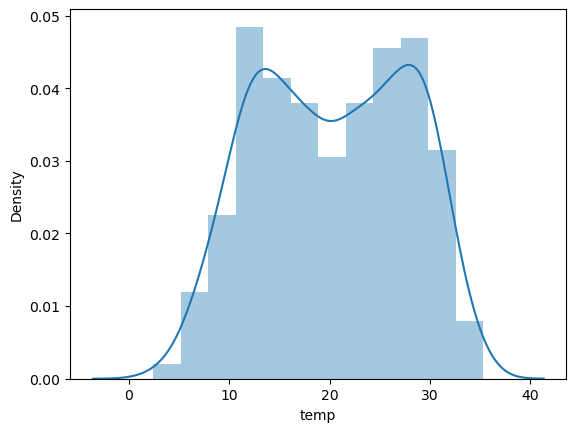

In [22]:
# plotting temp variable
sns.distplot(df_bike['temp'])
plt.show()

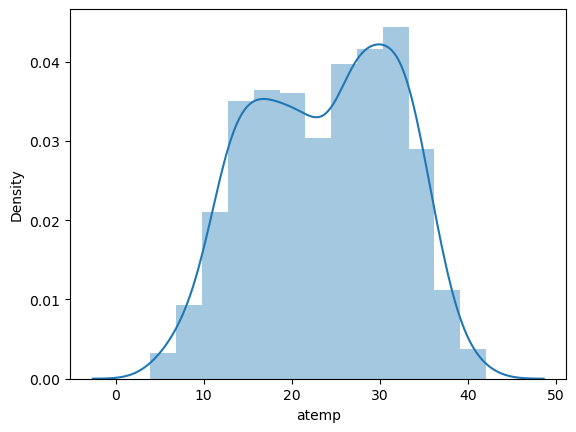

In [23]:
# plotting atemp variable
sns.distplot(df_bike['atemp'])
plt.show()

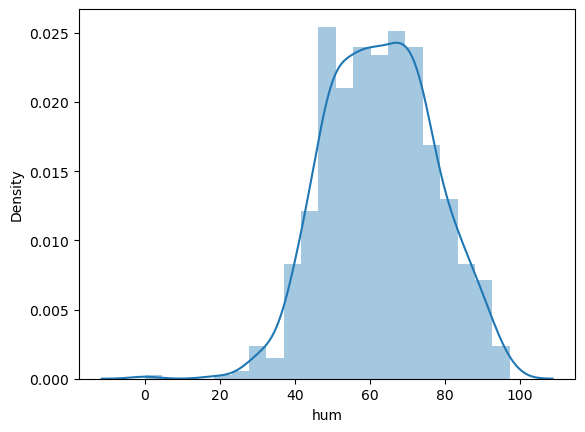

In [24]:
# plotting humidity
sns.distplot(df_bike['hum'])
plt.show()

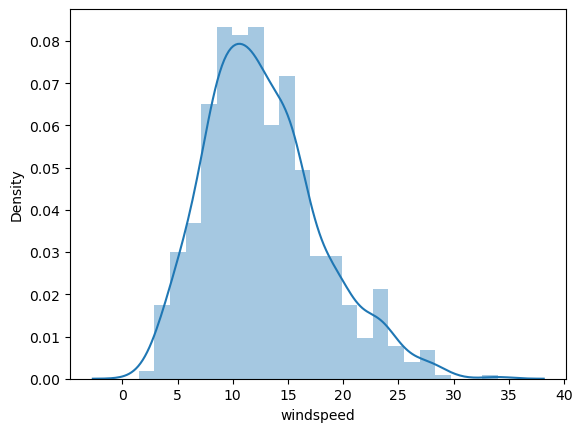

In [25]:
# plotting wind speed
sns.distplot(df_bike['windspeed'])
plt.show()

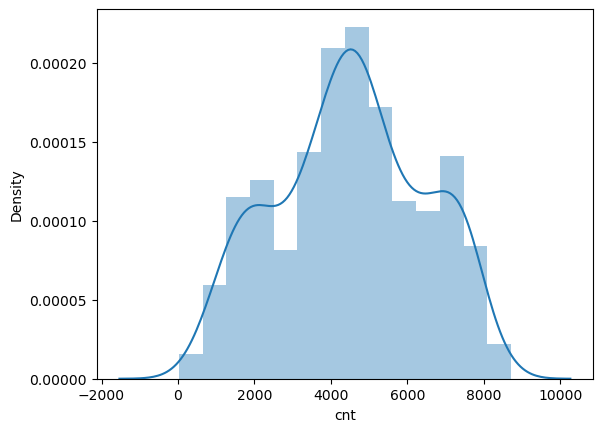

In [26]:
# Target variable: count of total rental bikes including both casual and registered
sns.distplot(df_bike['cnt'])
plt.show()

In [27]:
# Converting date to datetime format
df_bike['dteday'] = df_bike['dteday'].astype('datetime64[ns]')

In [28]:
# find categorical variables:
df_bike_cat = df_bike.select_dtypes(exclude=['float64','datetime64','int64'])
print(df_bike_cat.columns)

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')


In [29]:
df_bike_cat

,season,mnth,weekday,weathersit
0,spring,jan,mon,B
1,spring,jan,tue,B
2,spring,jan,wed,A
3,spring,jan,thur,A
4,spring,jan,fri,A
...,...,...,...,...
725,spring,dec,fri,B
726,spring,dec,sat,B
727,spring,dec,sun,B
728,spring,dec,mon,A


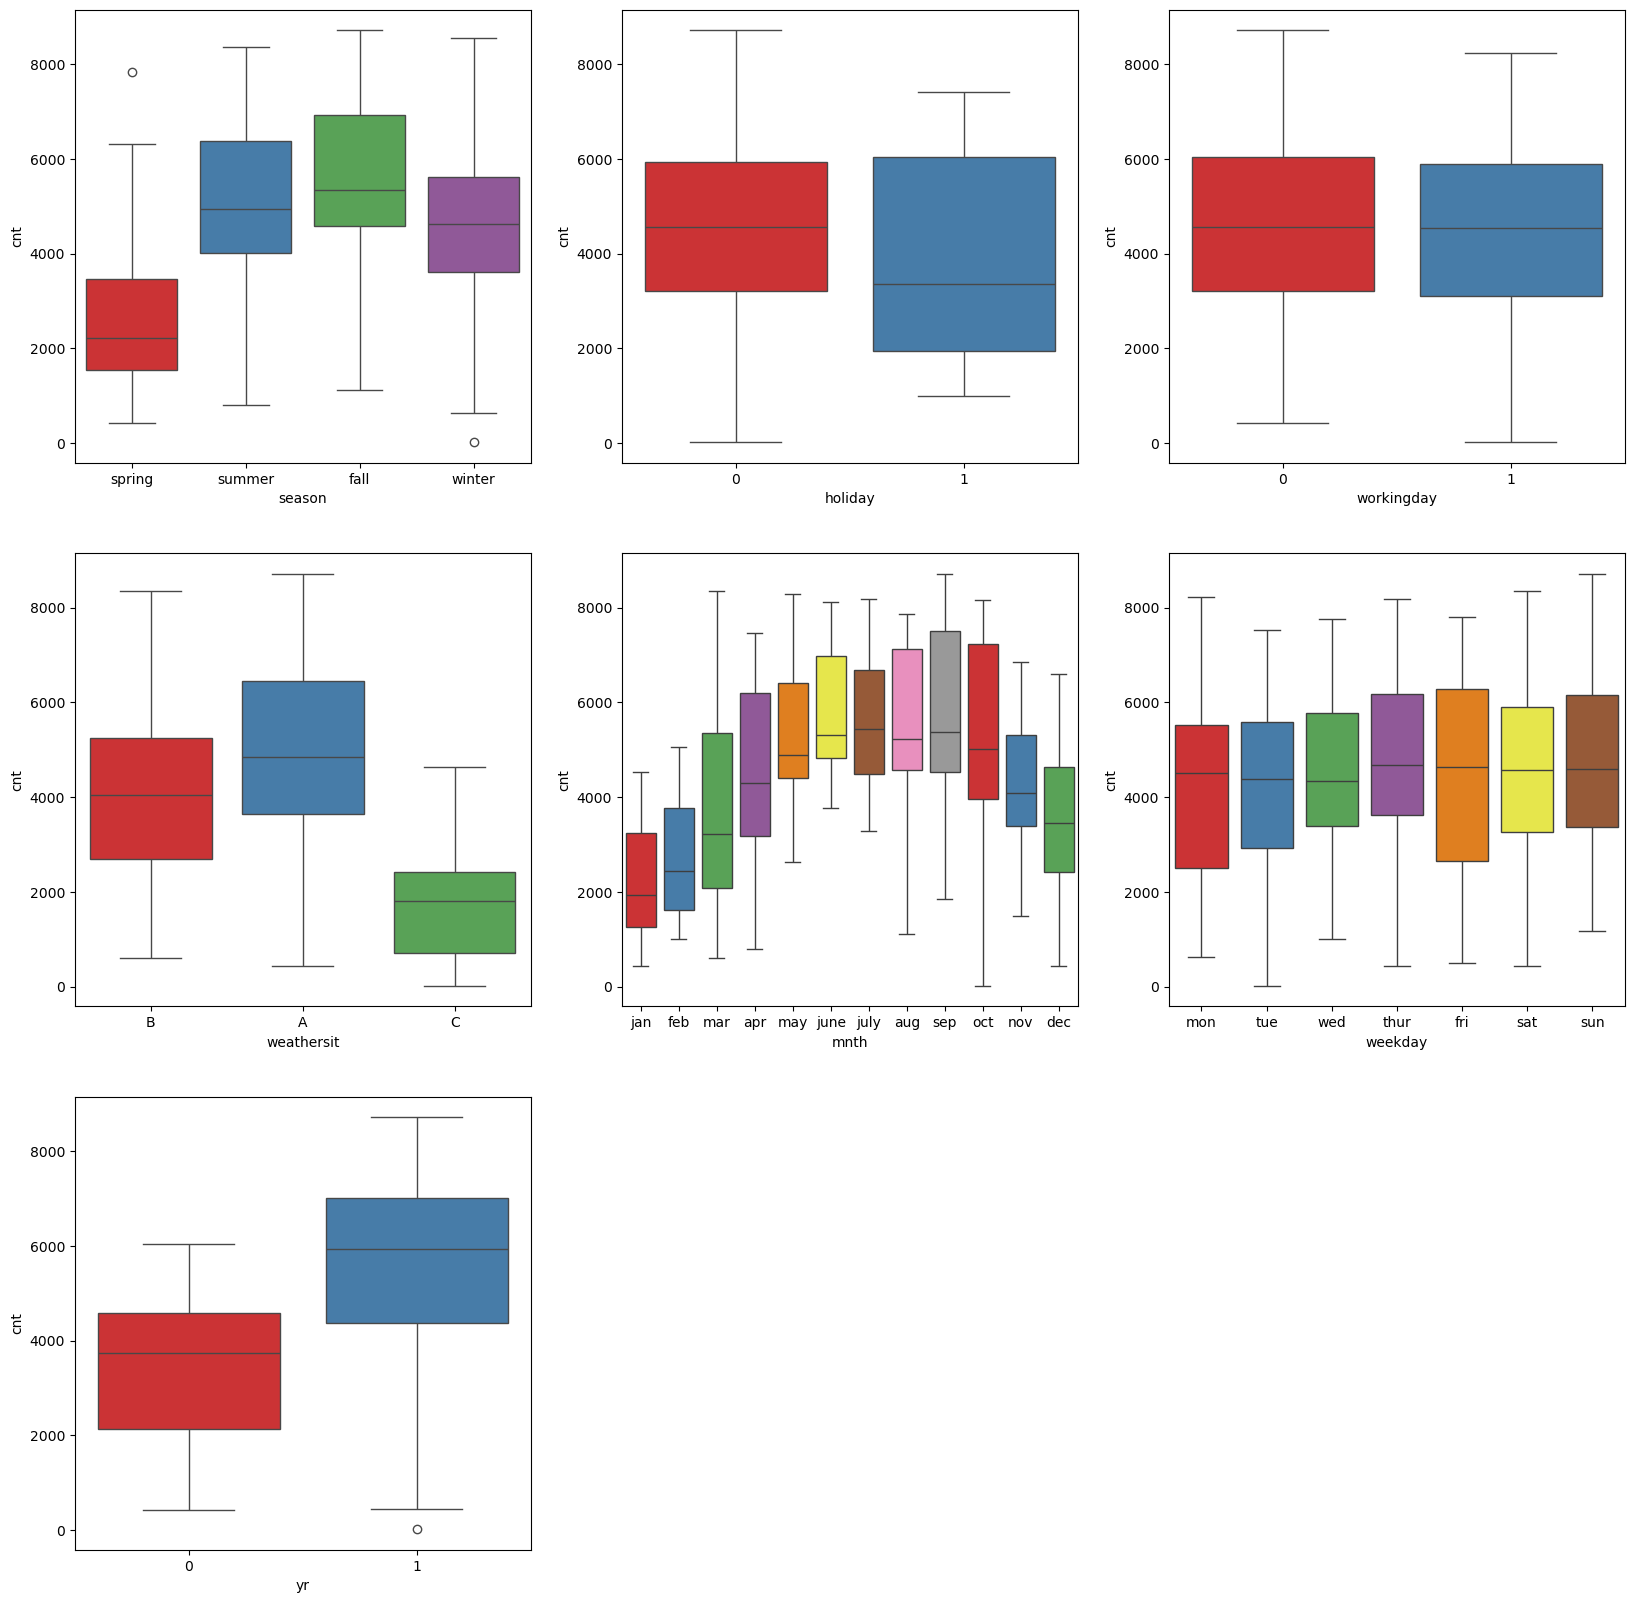

In [30]:
# Visualising the categorical columns:

plt.figure(figsize=(20, 20))  
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df_bike,palette = 'Set1')

plt.subplot(3,3,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = df_bike ,palette = 'Set1')

plt.subplot(3,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = df_bike , palette = 'Set1')

plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df_bike , palette = 'Set1')

plt.subplot(3,3,5)
sns.boxplot(x = 'mnth', y = 'cnt', data = df_bike, palette = 'Set1')

plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = df_bike, palette = 'Set1')

plt.subplot(3,3,7)
sns.boxplot(x = 'yr', y = 'cnt', data = df_bike, palette = 'Set1')
plt.show()


### Insights:
1. Fall has the highest average rentals, followed closely by summer.
2. 2019 sees a notable increase with a median rise of approximately 2000 rentals compared to 2018.
3. September tops the monthly rental count, with surrounding months showing substantial demand.
4. Holidays generally result in lower rental counts compared to working days.
5. Overall, no significant difference in rentals across weekdays is observed.

In [32]:
# Converting "casual","registered" and "cnt" numeric variables to float. 
df_bike['casual']= df_bike['casual'].astype('float')
df_bike['registered']= df_bike['registered'].astype('float')
df_bike['cnt']= df_bike['cnt'].astype('float')
df_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,jan,0,mon,1,B,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,2,2018-02-01,spring,0,jan,0,tue,1,B,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,3,2018-03-01,spring,0,jan,0,wed,1,A,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,4,2018-04-01,spring,0,jan,0,thur,1,A,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,5,2018-05-01,spring,0,jan,0,fri,1,A,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


In [33]:
# find numeric variables
df_bike_num = df_bike.select_dtypes(include=['float64'])
df_bike_num.head()

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


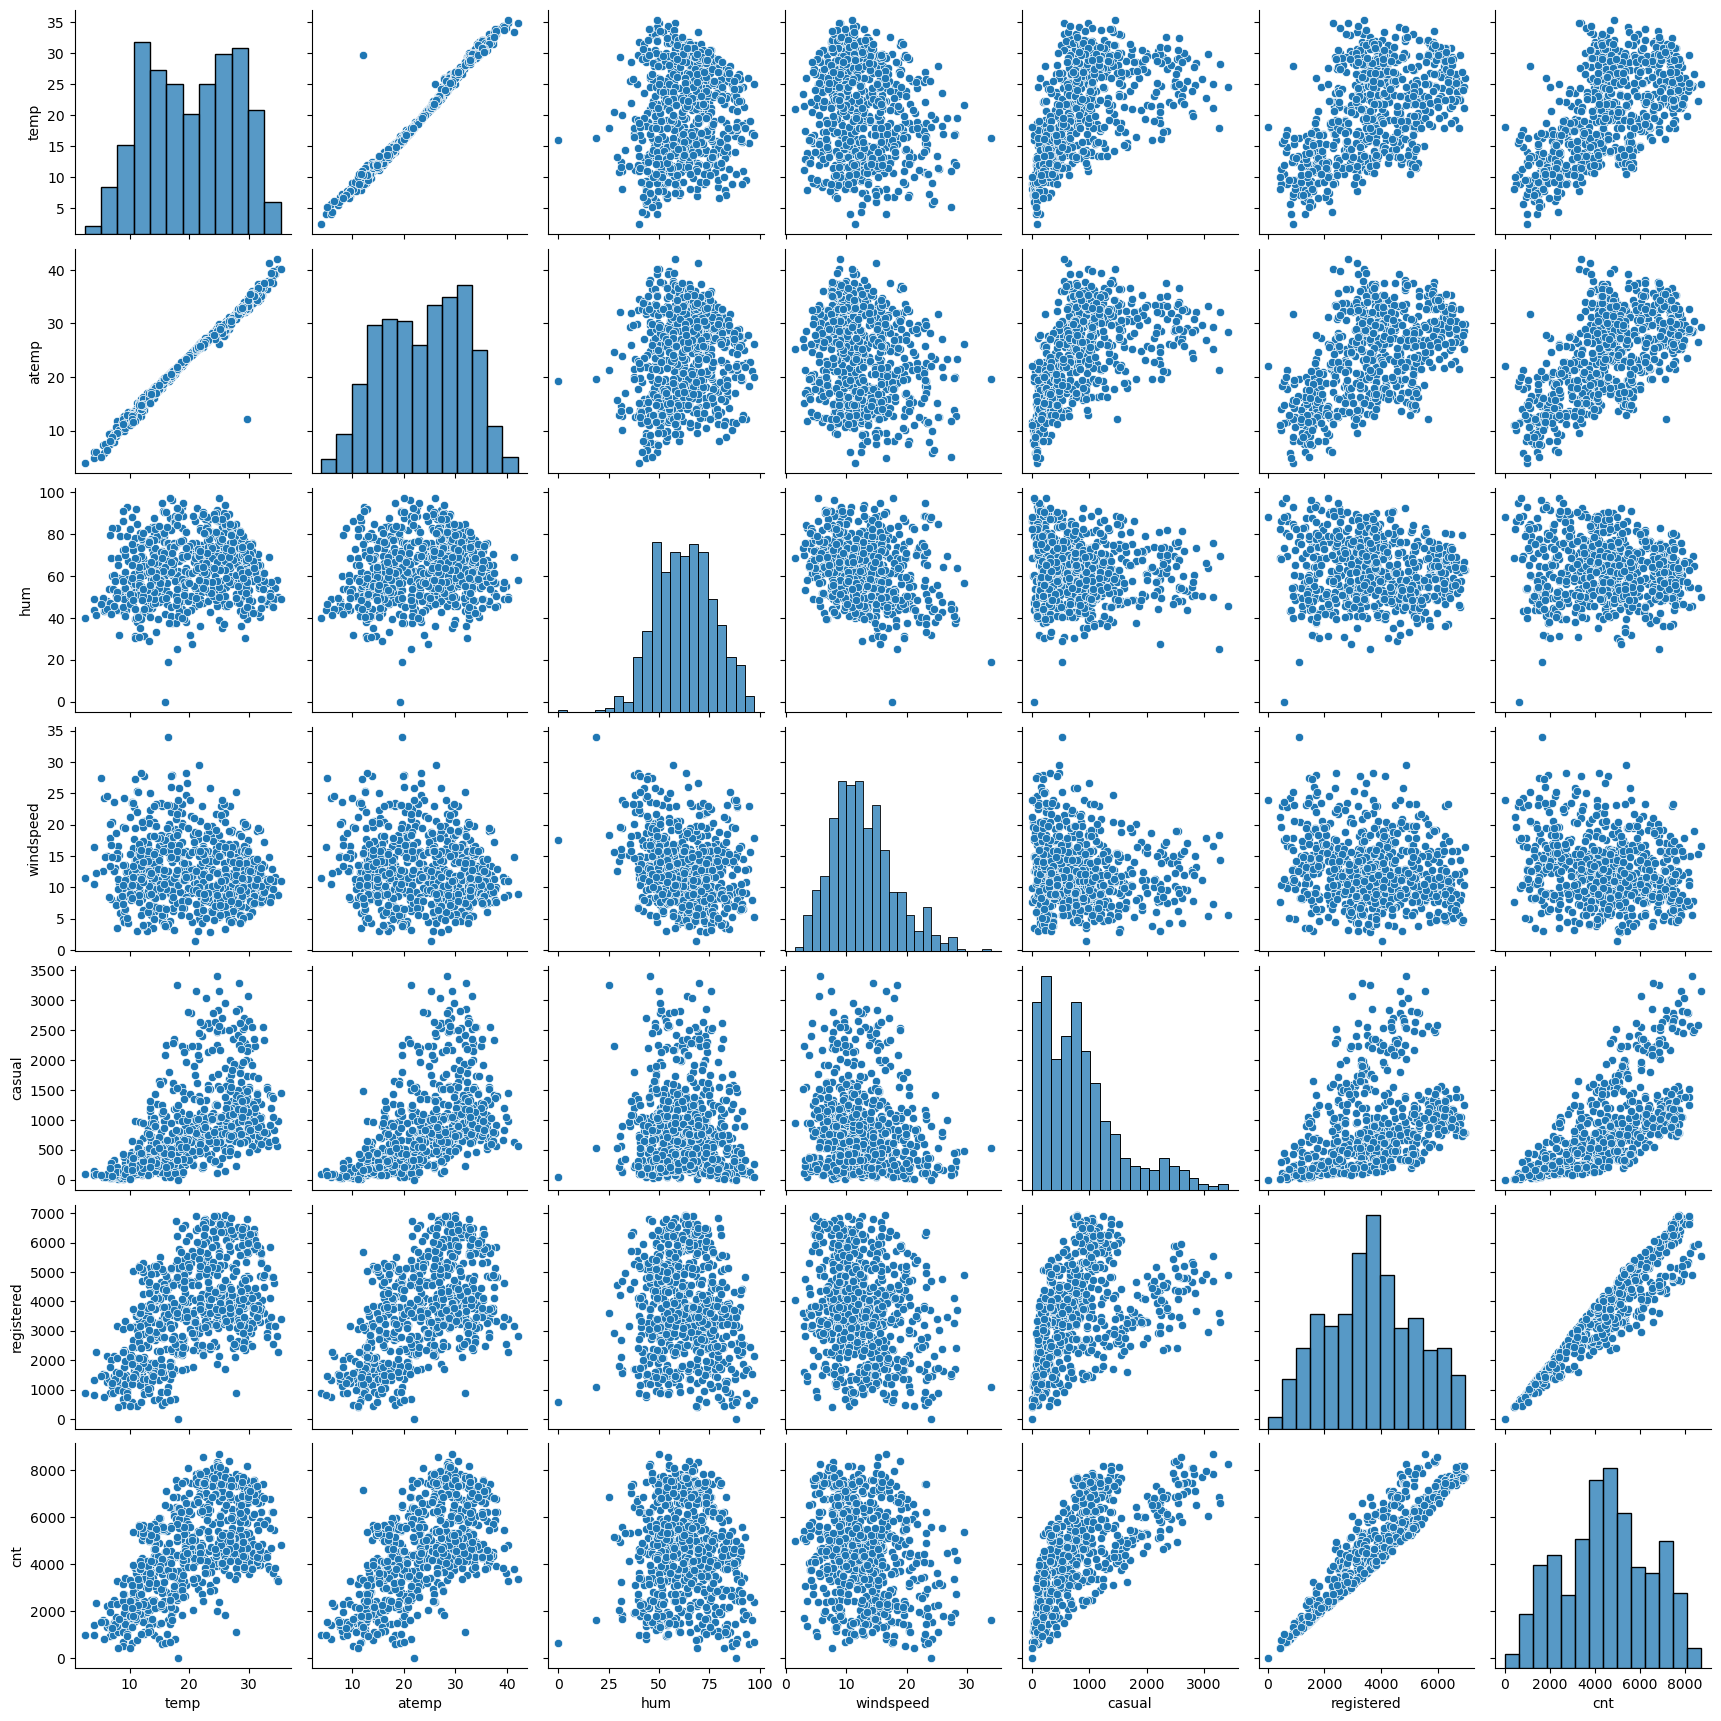

In [34]:
# Visualising the numeric columns:
sns.pairplot(df_bike_num)
plt.show()

In [35]:
# Correlation matrix
cor = df_bike_num.corr()
cor

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


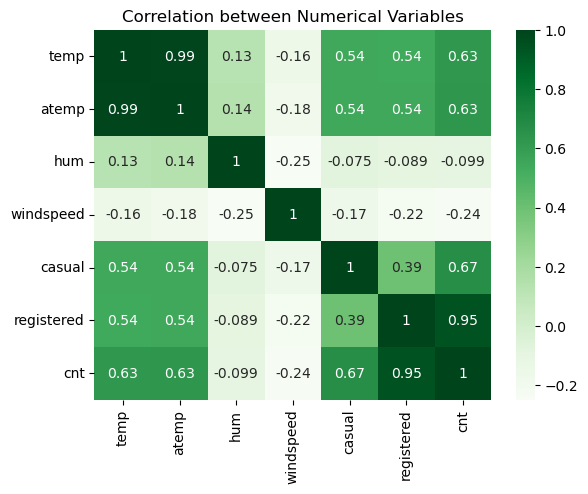

In [36]:
# Checking correlation between numeric vaiables
sns.heatmap(cor, annot = True, cmap="Greens")
plt.title("Correlation between Numerical Variables")
plt.show()

### Insights:
 From heatmap we can see relationship between target(cnt) and independent variables:
1. cnt is positively correlated with casual ,registered as these columns describes part of cnt and with temp and atemp also.
2. The count of shared bike rentals shows a negative correlation with 'windspeed' . This suggests that on windy days, the demand for shared bikes tends    to be lower compared to regular days.
3. We can see that temp and atemp are highly correlated. As they are independent variable so this can create multicollinearity while model building.

In [38]:
# drop atemp as it is highly correlated with temp
df_bike = df_bike.drop('atemp' ,axis=1)

## Step 3. Data Preparation

In [40]:
# Subset all categorical variables
df_bike_cat = df_bike.select_dtypes(include=['object'])

### Dummy Variables

The variable `season`,`mnth`,`weekday` and `weathersit` have different levels. We need to convert these levels into integers. 


In [43]:
# converting  mnth, weekday, weathersit and season to dummy variables
df_bike_dummies = pd.get_dummies(df_bike_cat, drop_first=True).astype(int)
df_bike_dummies.head()

,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_july,mnth_june,mnth_mar,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thur,weekday_tue,weekday_wed,weathersit_B,weathersit_C
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
# Drop categorical variable columns
df_bike = df_bike.drop(list(df_bike_cat.columns), axis=1)

In [45]:
# concat the dummy vars with main dataframe
df_bike = pd.concat([df_bike,df_bike_dummies], axis=1)

In [46]:
# Let's check the first few rows
df_bike.head()

,instant,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thur,weekday_tue,weekday_wed,weathersit_B,weathersit_C
0,1,2018-01-01,0,0,1,14.110847,80.5833,10.749882,331.0,654.0,...,0,0,1,0,0,0,0,0,1,0
1,2,2018-02-01,0,0,1,14.902598,69.6087,16.652113,131.0,670.0,...,0,0,0,0,0,0,1,0,1,0
2,3,2018-03-01,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,...,0,0,0,0,0,0,0,1,0,0
3,4,2018-04-01,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,...,0,0,0,0,0,1,0,0,0,0
4,5,2018-05-01,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
# Drop the 'instant' and 'dteday' column as they of not any use to us for the analysis
df_bike =df_bike.drop(['instant','dteday'], axis = 1, inplace = False)
df_bike.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thur,weekday_tue,weekday_wed,weathersit_B,weathersit_C
0,0,0,1,14.110847,80.5833,10.749882,331.0,654.0,985.0,1,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,69.6087,16.652113,131.0,670.0,801.0,1,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0,1,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0,1,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0,1,...,0,0,0,0,0,0,0,0,0,0


In [48]:
df_bike.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thur,weekday_tue,weekday_wed,weathersit_B,weathersit_C
0,0,0,1,14.110847,80.5833,10.749882,331.0,654.0,985.0,1,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,69.6087,16.652113,131.0,670.0,801.0,1,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0,1,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0,1,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0,1,...,0,0,0,0,0,0,0,0,0,0


## Step 4: Splitting the Data into Training and Testing Sets

In [50]:
# split dataframe into train and test
np.random.seed(0)
df_train, df_test = train_test_split(df_bike, train_size=0.7, test_size=0.3, random_state=100)

In [51]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thur,weekday_tue,weekday_wed,weathersit_B,weathersit_C
653,1,0,1,19.201653,55.8333,12.208807,922.0,6612.0,7534.0,0,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,29.246653,70.4167,11.083475,968.0,6248.0,7216.0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,16.980847,62.1250,10.792293,956.0,3110.0,4066.0,1,...,0,0,0,0,1,0,0,0,1,0
728,1,0,1,10.489153,48.3333,23.500518,364.0,1432.0,1796.0,1,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,1120.0,3100.0,4220.0,0,...,0,0,0,0,1,0,0,0,1,0


### Rescaling the features

 Rescale the numeric columns using MinMaxScaler

In [54]:
scaler = MinMaxScaler()

In [55]:
# create a list of numerical variables
num_var = ['temp', 'hum', 'windspeed','casual','registered','cnt']

df_train[num_var] = scaler.fit_transform(df_train[num_var])

In [56]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thur,weekday_tue,weekday_wed,weathersit_B,weathersit_C
653,1,0,1,0.509887,0.575354,0.300794,0.280402,0.951776,0.864243,0,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.294422,0.899220,0.827658,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.290765,0.446145,0.465255,1,...,0,0,0,0,1,0,0,0,1,0
728,1,0,1,0.245101,0.498067,0.663106,0.110332,0.203869,0.204096,1,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.340750,0.444701,0.482973,0,...,0,0,0,0,1,0,0,0,1,0


In [57]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thur,weekday_tue,weekday_wed,weathersit_B,weathersit_C
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.650369,0.320768,0.254661,0.523944,0.513620,0.243137,...,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.343137,0.029412
std,0.500429,0.157763,0.453386,0.225844,0.145882,0.169797,0.206011,0.228175,0.224593,0.429398,...,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.094179,0.353487,0.356420,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.212740,0.525123,0.518638,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.327415,0.696073,0.684710,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


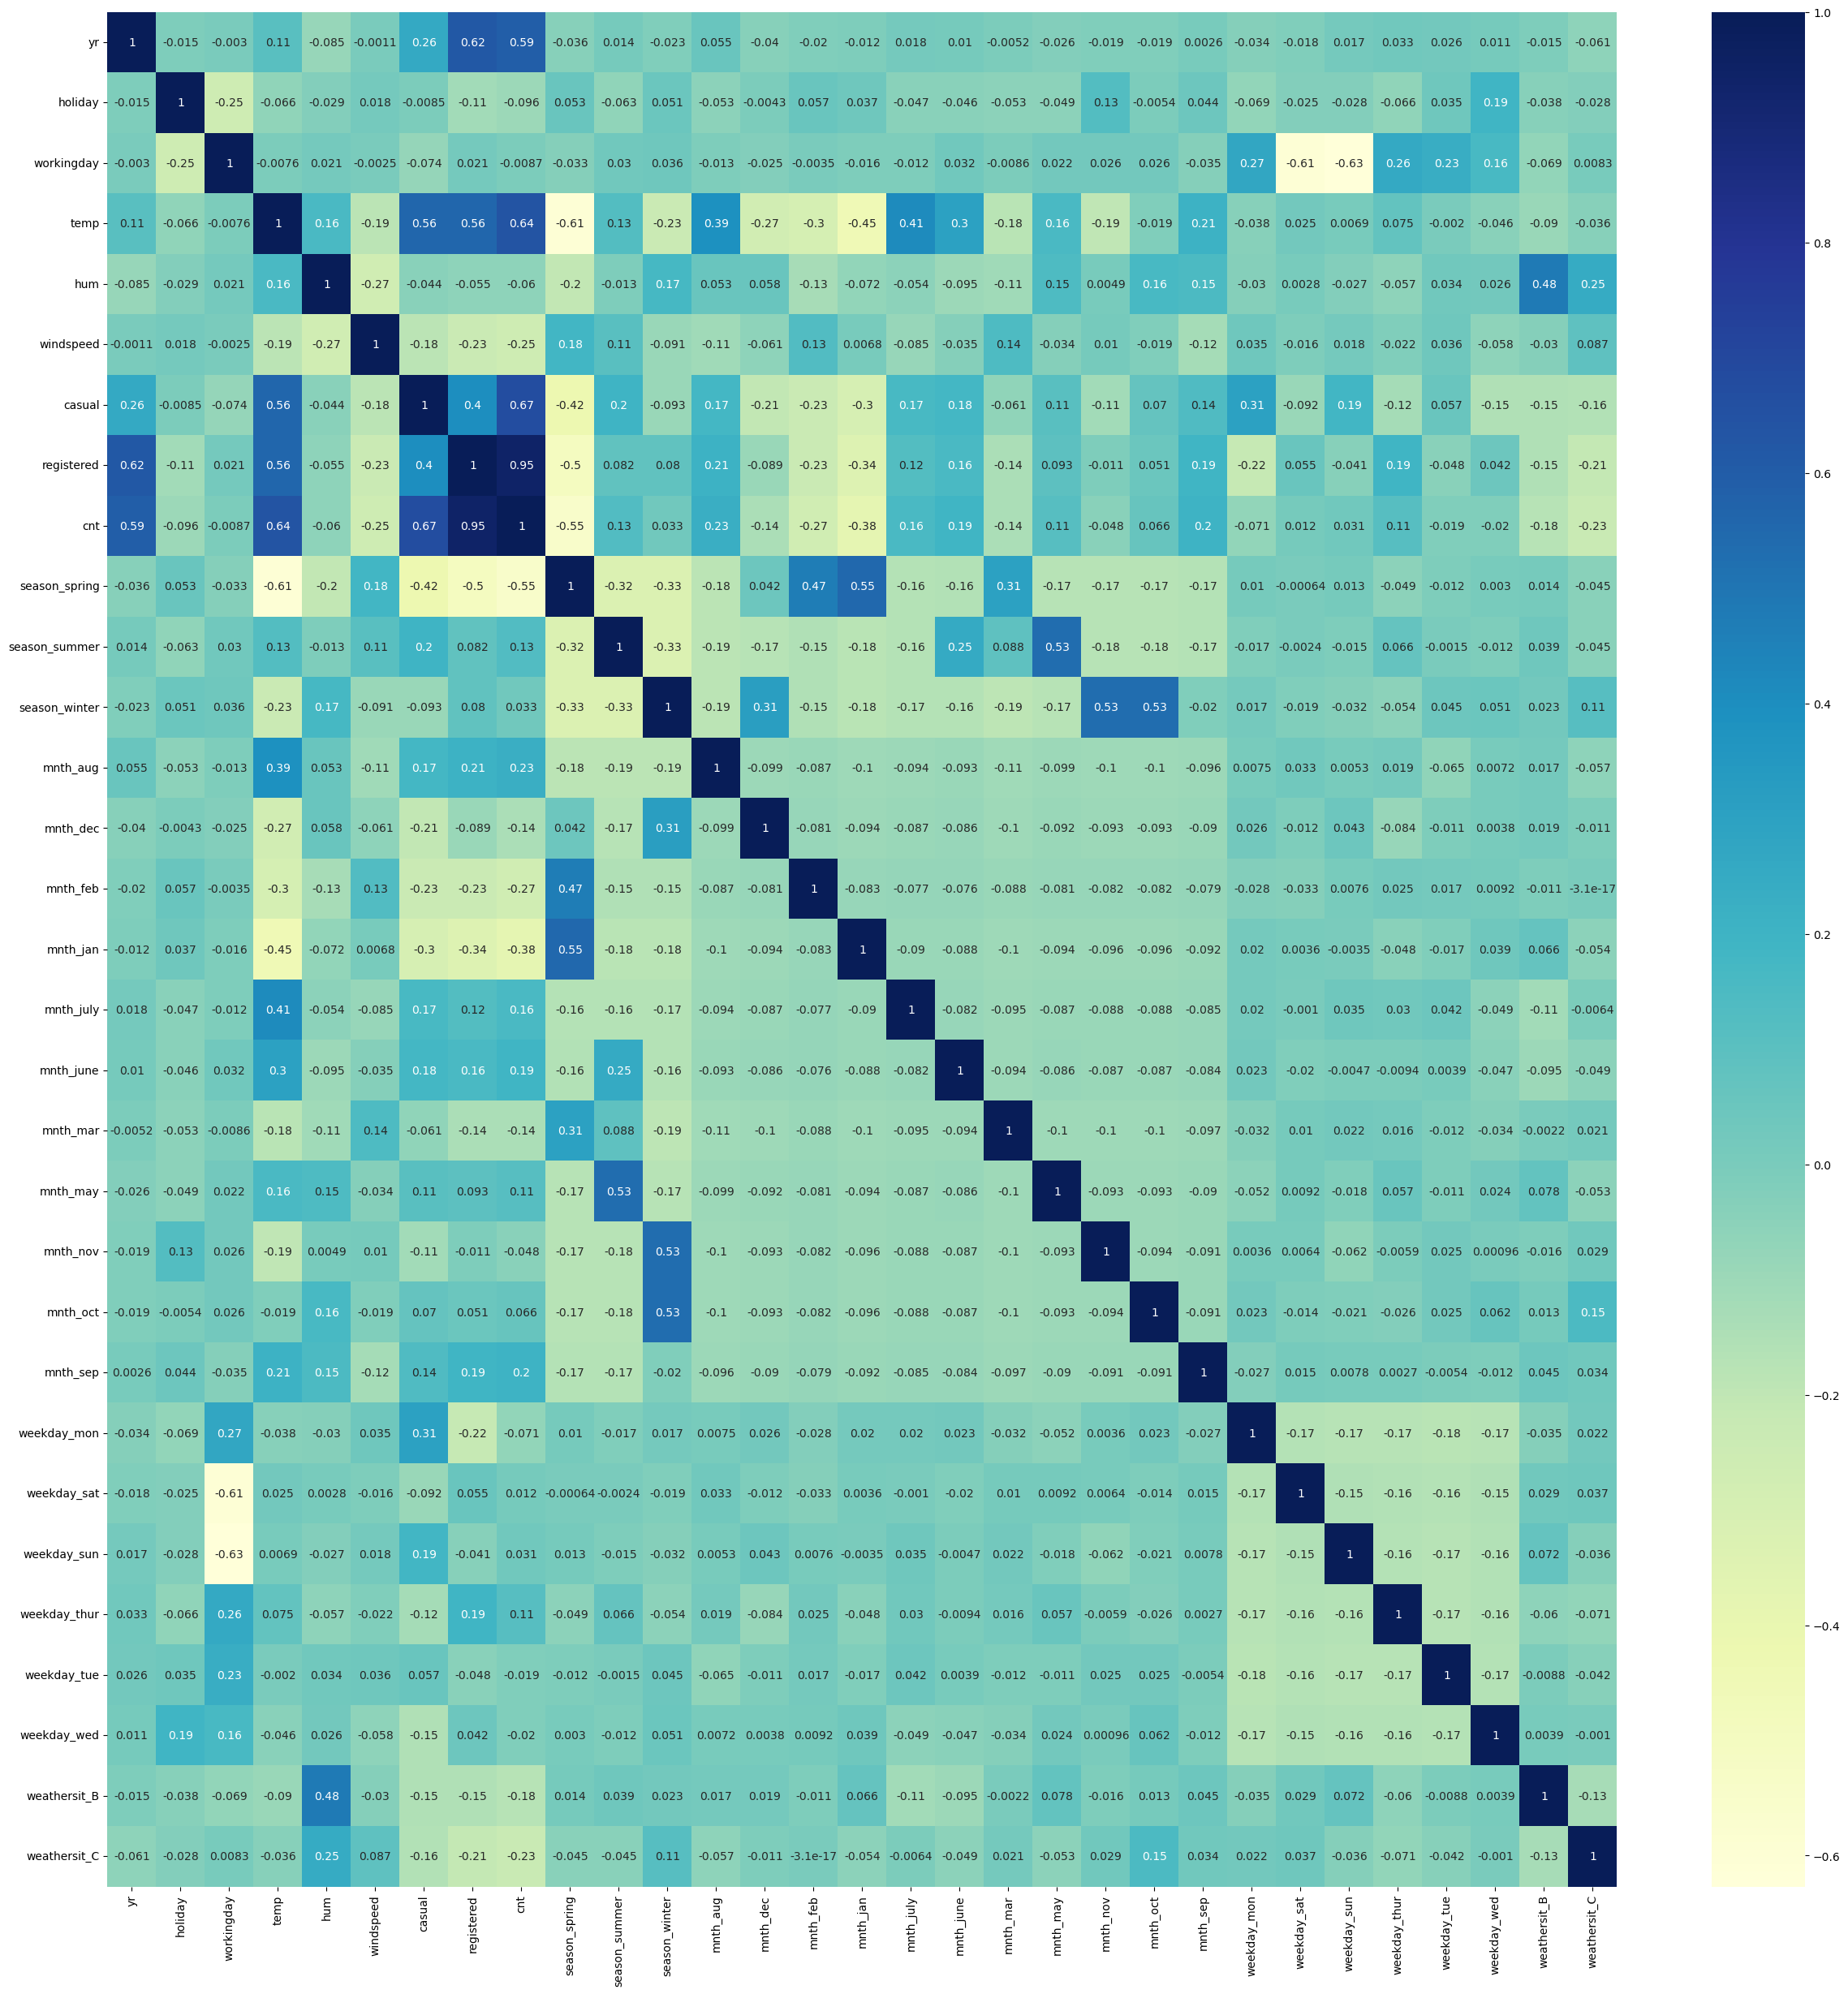

In [58]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Insight:
We can see that the variable "temp" is most strongly correlated with "cnt," followed by "casual" and "registered." Let's visualize this relationship
by creating a pairplot for "temp" and "cnt."

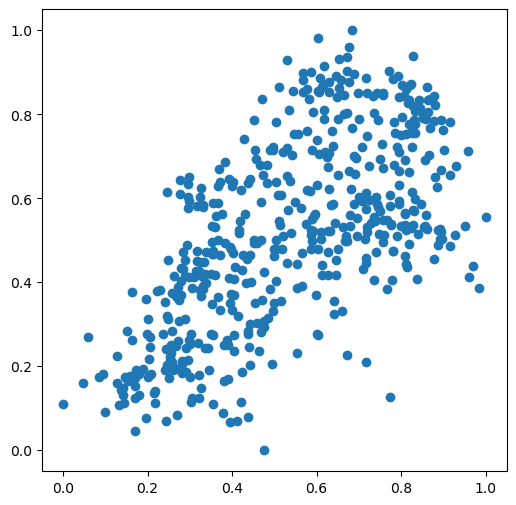

In [60]:
# as cnt and temp are correlated ,we can check pattern between these two by using scatter plot
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

#### Dividing into X and Y sets for the model building

In [62]:
# Dropping 'casual' and 'registered' as they have same information as cnt have:
y_train = df_train.pop('cnt')
X_train = df_train.drop(["casual","registered"],axis=1) 

In [63]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thur,weekday_tue,weekday_wed,weathersit_B,weathersit_C
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
728,1,0,1,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [64]:
X_train.shape

(510, 28)

## Step 5: Building a model


## Building first model with all variables


In [67]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# create model
lr = sm.OLS(y_train , X_train_lm).fit()
#params
lr.params

const            0.394543
yr               0.230857
holiday         -0.135424
workingday      -0.060524
temp             0.445458
hum             -0.157315
windspeed       -0.183046
season_spring   -0.043705
season_summer    0.042243
season_winter    0.110897
mnth_aug         0.021507
mnth_dec        -0.045669
mnth_feb        -0.037279
mnth_jan        -0.063612
mnth_july       -0.034910
mnth_june        0.000975
mnth_mar         0.000608
mnth_may         0.024064
mnth_nov        -0.041555
mnth_oct         0.005790
mnth_sep         0.086055
weekday_mon     -0.024633
weekday_sat     -0.056319
weekday_sun     -0.049961
weekday_thur     0.003863
weekday_tue     -0.026299
weekday_wed     -0.011241
weathersit_B    -0.059355
weathersit_C    -0.251511
dtype: float64

In [68]:
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [69]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 0.23085682 -0.13542389 -0.06052424  0.44545797 -0.15731473 -0.18304612
 -0.04370474  0.04224289  0.11089693  0.02150709 -0.04566922 -0.03727876
 -0.06361179 -0.03490968  0.00097451  0.00060798  0.02406416 -0.04155465
  0.00578994  0.08605503 -0.02463298 -0.05631912 -0.04996141  0.00386328
 -0.02629921 -0.01124081 -0.05935514 -0.25151085]
0.3945428483421015


In [70]:
# params
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     98.04
Date:                Tue, 03 Dec 2024   Prob (F-statistic):          4.33e-179
Time:                        10:36:06   Log-Likelihood:                 523.81
No. Observations:                 510   AIC:                            -989.6
Df Residuals:                     481   BIC:                            -866.8
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3945      0.085      4.640      0.000       0.227       0.562
yr                0.2309      0.008     28.387      0.000       0.215       0.247
holiday          -0.1354      0.065     -2.072      0.039      -0.264      -0.007
workingday       -0.0605      0.071     -0.852      0.395      -0.200       0.079
temp              0.4455      0.047      9.513      0.000       0.353       0.537
hum              -0.1573      0.039     -4.049      0.000      -0.234      -0.081
windspeed        -0.1830      0.026     -7.036      0.000      -0.234      -0.132
season_spring    -0.0437      0.030     -1.444      0.149      -0.103       0.016
season_summer     0.0422      0.026      1.598      0.111      -0.010       0.094
season_winter     0.1109      0.028      3.938      0.000       0.056       0.166
mnth_aug          0.0215      0.034      0.632      0.527      -0.045       0.088
mnth_dec         -0.0457      0.034     -1.348      0.178      -0.112       0.021
mnth_feb         -0.0373      0.033     -1.121      0.263      -0.103       0.028
mnth_jan         -0.0636      0.034     -1.880      0.061      -0.130       0.003
mnth_july        -0.0349      0.035     -0.985      0.325      -0.105       0.035
mnth_june         0.0010      0.025      0.038      0.969      -0.049       0.051
mnth_mar          0.0006      0.025      0.025      0.980      -0.048       0.049
mnth_may          0.0241      0.021      1.134      0.257      -0.018       0.066
mnth_nov         -0.0416      0.037     -1.133      0.258      -0.114       0.031
mnth_oct          0.0058      0.036      0.160      0.873      -0.065       0.077
mnth_sep          0.0861      0.032      2.667      0.008       0.023       0.149
weekday_mon      -0.0246      0.015     -1.690      0.092      -0.053       0.004
weekday_sat      -0.0563      0.072     -0.787      0.432      -0.197       0.084
weekday_sun      -0.0500      0.071     -0.699      0.485      -0.190       0.091
weekday_thur      0.0039      0.015      0.258      0.796      -0.026       0.033
weekday_tue      -0.0263      0.015     -1.792      0.074      -0.055       0.003
weekday_wed      -0.0112      0.015     -0.736      0.462      -0.041       0.019
weathersit_B     -0.0594      0.011     -5.637      0.000      -0.080      -0.039
weathersit_C     -0.2515      0.027     -9.455      0.000      -0.304      -0.199
==============================================================================
Omnibus:                       78.889   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.035
Skew:                          -0.768   Prob(JB):                     4.06e-46
Kurtosis:                       5.735   Cond. No.                         70.4
================================================================

### Observation:
We can see above model has Adj R-squared value of 84.2 which is a good value indeed but here we took all variables. As features are 28 so we should go for RFE for selected features.now we can check model if we drop some variables which are not much relevant using RFE.

### Building a Model Using Recursive feature elimination(RFE) with 20 features

In [73]:
# Selecting features using RFE .first start with 20 features:

In [74]:
# Create a linear regression model
lm = LinearRegression()
rfe = RFE(estimator=lm, n_features_to_select = 20)

# Fit with 15 features
rfe.fit(X_train, y_train)

# Print the boolean results
print(rfe.support_)           
print(rfe.ranking_)  

[ True  True  True  True  True  True  True  True  True False  True  True
  True  True False False  True  True False  True False  True  True False
 False False  True  True]
[1 1 1 1 1 1 1 1 1 4 1 1 1 1 8 9 1 1 6 1 3 1 1 7 2 5 1 1]


In [75]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 4),
 ('mnth_dec', True, 1),
 ('mnth_feb', True, 1),
 ('mnth_jan', True, 1),
 ('mnth_july', True, 1),
 ('mnth_june', False, 8),
 ('mnth_mar', False, 9),
 ('mnth_may', True, 1),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 6),
 ('mnth_sep', True, 1),
 ('weekday_mon', False, 3),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thur', False, 7),
 ('weekday_tue', False, 2),
 ('weekday_wed', False, 5),
 ('weathersit_B', True, 1),
 ('weathersit_C', True, 1)]

#### After feature selection through RFE, we can use statmodels to check statistics.

#### Building model using statsmodel, for the detailed statistics

In [78]:
# Creating X_train dataframe with RFE selected variables
col = X_train.columns[rfe.support_]

# Subsetting training data for 20 selected columns
X_train_rfe = X_train[col]

# Add a constant to the model
X_train_rfe = sm.add_constant(X_train_rfe)
X_train_rfe.head()

,const,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_feb,mnth_jan,mnth_july,mnth_may,mnth_nov,mnth_sep,weekday_sat,weekday_sun,weathersit_B,weathersit_C
653,1.0,1,0,1,0.509887,0.575354,0.300794,0,0,1,...,0,0,0,0,0,0,0,0,0,0
576,1.0,1,0,1,0.815169,0.725633,0.264686,0,0,0,...,0,0,1,0,0,0,0,0,0,0
426,1.0,1,0,0,0.442393,0.640189,0.255342,1,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1.0,1,0,1,0.245101,0.498067,0.663106,1,0,0,...,0,0,0,0,0,0,0,0,0,0
482,1.0,1,0,0,0.395666,0.504508,0.188475,0,1,0,...,0,0,0,0,0,0,0,1,1,0


In [79]:
# Fitting the model with 20 variables
lm1 = sm.OLS(y_train, X_train_rfe).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     136.9
Date:                Tue, 03 Dec 2024   Prob (F-statistic):          9.48e-186
Time:                        10:36:06   Log-Likelihood:                 519.76
No. Observations:                 510   AIC:                            -997.5
Df Residuals:                     489   BIC:                            -908.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3935      0.081      4.850

### Observation:
The above model, using RFE with 20 features, shows no difference in adjusted R2 score.The accuracy is same as before 84.2 which is a positive sign.

Now we need to check for multicollinearity among these variables

In [82]:
a = X_train_rfe.drop('const',axis=1)

In [83]:
# calculate the VIF value
vif = pd.DataFrame()
vif['Features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,48.84
4,hum,38.65
3,temp,29.21
17,weekday_sun,9.80
16,weekday_sat,9.41
6,season_spring,7.09
5,windspeed,5.47
8,season_winter,4.92
7,season_summer,4.30
11,mnth_jan,2.55


### Interpretation:
Now we can see that for the above model with 20 features Adj r2 is same as with 28 features but p-values and VIF are not in range for many features so
we can consider with less number of features.moreover it will reduce complexity also.

### Building another model with 14 features

In [86]:
# create RFE model with 14 features
lm = LinearRegression()
rfe1 =  RFE(estimator=lm, n_features_to_select = 14)

# Fit with 14 features
rfe1.fit(X_train, y_train)

# Print the boolean results
print(rfe1.support_)           
print(rfe1.ranking_)  

[ True  True False  True  True  True  True  True  True False False False
  True  True False False False  True False  True False False False False
 False False  True  True]
[ 1  1  4  1  1  1  1  1  1 10  2  3  1  1 14 15  7  1 12  1  9  5  6 13
  8 11  1  1]


In [87]:
# Creating X_train dataframe with RFE 14 variables 
col = X_train.columns[rfe1.support_]

# Subsetting training data for 14 selected columns
X_train_rfe1 = X_train[col]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,yr,holiday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_jan,mnth_july,mnth_nov,mnth_sep,weathersit_B,weathersit_C
653,1.0,1,0,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,1,0
728,1.0,1,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,1,0


In [88]:
# Fitting the model with 14 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.4
Date:                Tue, 03 Dec 2024   Prob (F-statistic):          2.25e-189
Time:                        10:36:06   Log-Likelihood:                 512.39
No. Observations:                 510   AIC:                            -994.8
Df Residuals:                     495   BIC:                            -931.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3030      0.035      8.597

### Observation :
The model using Recursive Feature Elimination (RFE) with 14 features demonstrates only a slight decrease in Adj R2 from 84.2% to 84.0 % compared to
using 20 features. This minimal drop indicates that the selected 14 features retain most of the predictive power. Now we need to check multicollinearity.


In [90]:
# Now we will check for multicollinearity.
b = X_train_rfe1.drop('const',axis=1)

In [91]:
# calculate the VIF value
vif = pd.DataFrame()
vif['Features'] = b.columns
vif['VIF'] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,29.12
2,temp,16.80
4,windspeed,4.71
5,season_spring,4.37
7,season_winter,3.78
6,season_summer,2.79
12,weathersit_B,2.29
0,yr,2.09
8,mnth_jan,1.67
9,mnth_july,1.59


### Interpretation :
Now we can see that for the above model with 14 features Adj r2 has slightly dropped from 84.2 % to 84.0% but p-values and VIF are not in range for
many features so we can again check for less number of features.moreover it will reduce complexity also. if not too much drop in Adj r2 then can go 
further.if p-value not in range that means that feature is not that significant .

### Building another model with 9 features

In [94]:
# create RFE model with 9 features
lm = LinearRegression()
rfe2 =  RFE(estimator=lm, n_features_to_select = 9)

# Fit with 9 features
rfe2.fit(X_train, y_train)

# Print the boolean results
print(rfe2.support_)           
print(rfe2.ranking_)  

[ True  True False  True  True  True  True False  True False False False
 False  True False False False False False False False False False False
 False False False  True]
[ 1  1  9  1  1  1  1  4  1 15  7  8  5  1 19 20 12  6 17  2 14 10 11 18
 13 16  3  1]


In [95]:
# Creating X_train dataframe with RFE 9 variables 
col = X_train.columns[rfe2.support_]

# Subsetting training data for 9 selected columns
X_train_rfe2 = X_train[col]

# Add a constant to the model
X_train_rfe2 = sm.add_constant(X_train_rfe2)
X_train_rfe2.head()

,const,yr,holiday,temp,hum,windspeed,season_spring,season_winter,mnth_july,weathersit_C
653,1.0,1,0,0.509887,0.575354,0.300794,0,1,0,0
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,1,0
426,1.0,1,0,0.442393,0.640189,0.255342,1,0,0,0
728,1.0,1,0,0.245101,0.498067,0.663106,1,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,0,0,0,0


In [96]:
# Fitting the model with 9 variables
lm3 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     261.6
Date:                Tue, 03 Dec 2024   Prob (F-statistic):          8.34e-183
Time:                        10:36:07   Log-Likelihood:                 482.70
No. Observations:                 510   AIC:                            -945.4
Df Residuals:                     500   BIC:                            -903.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3711      0.031     11.810

### Observation:
The model using Recursive Feature Elimination (RFE) with 9 features demonstrates a slight decrease in Adj R2 from 84.0 % to 82.2 % compared to
using 20 features. This minimal drop indicates that the selected 9 features retain most of the predictive power.moreover reducing complexity also. Now we need to check multicollinearity.


In [98]:
# check VIF for multicollinearity
c = X_train_rfe2.drop('const',axis=1)

In [99]:
# calculate the VIF value
vif = pd.DataFrame()
vif['Features'] = c.columns
vif['VIF'] = [variance_inflation_factor(c.values, i) for i in range(c.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,15.14
2,temp,12.84
4,windspeed,3.97
5,season_spring,2.38
0,yr,2.06
6,season_winter,1.97
7,mnth_july,1.35
8,weathersit_C,1.11
1,holiday,1.04


### Insight :
From the model summary above, all the variables have p-value < 0.05 and from the p-value perspective, all variables seem significant. But notice that
there are a few variables which have VIF > 5. We need to deal with these variables carefully.

So let's try removing 'hum' first having the maximum VIF and then check for it again. Dropping this variable may result in a change in other VIFs which
are high.

In [101]:
# # Let's drop the 'hum' column
X_train_rfe2.drop("hum",axis=1,inplace=True)

In [102]:
# Rebuild model without hum feature
# Creating X_train dataframe with RFE selected variables
# Now that we have removed one variable, let's fit the model with 8 variables

lm4 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     252.6
Date:                Tue, 03 Dec 2024   Prob (F-statistic):          2.14e-170
Time:                        10:36:07   Log-Likelihood:                 450.60
No. Observations:                 510   AIC:                            -883.2
Df Residuals:                     501   BIC:                            -845.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2038      0.025      8.022

### Observation:
The model using Recursive Feature Elimination (RFE) with 8 features shows a slight decrease in Adj R2 from 82.2 % to 79.8 % compared to
using 9 features. This minimal drop indicates that the selected 7 features retain most of the predictive power.moreover reducing complexity also.All features have p-value 0 except holiday. Now we need to check multicollinearity.


In [104]:
d = X_train_rfe2.drop('const',axis=1)

In [105]:
# calculate the VIF value
vif = pd.DataFrame()
vif['Features'] = d.columns
vif['VIF'] = [variance_inflation_factor(d.values, i) for i in range(d.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.96
3,windspeed,3.93
0,yr,2.06
4,season_spring,1.61
5,season_winter,1.37
6,mnth_july,1.29
7,weathersit_C,1.06
1,holiday,1.04


### Interpretation:
All the VIF values and p-values seem to be in the permissible range now. Also the `Adjusted R-squared` value has dropped from `84.5%` with **28 variables** to just `79.8 %` using **8 variables**. This model is explaining most of the variance without being too complex. So let's proceed with this model.

### Observation:

while the model with 28 variables has `Adjusted R-squared` 84.2%, it introduces complexity and potential overfitting. The model with **20 variables** has same Adj r2 84.2 % but many of features' p-value are not in range and complex also.The model with **14 variables**, though slightly drop (Adj r2 = 84.0 %), has a concern with multicollinearity, particularly with the temp variable having a VIF > 5.The model with **8 variables**, while having Adj r2 79.8 % but offers the best balance between simplicity and performance. 

Given the multicollinearity issue in the 14-variable model and the preference for a simpler, stable model, we are proceeding with the 8-variable model for further analysis.

### Residual Analysis 

In [109]:
y_train_cnt = lm4.predict(X_train_rfe2)

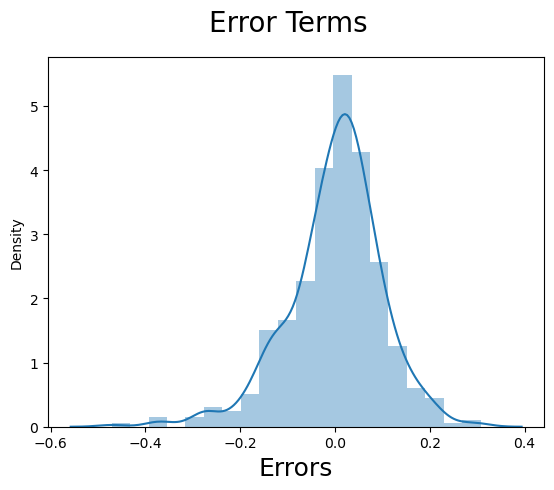

In [110]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
# Plot heading
fig.suptitle('Error Terms', fontsize = 20)    
# Give the X-label
plt.xlabel('Errors', fontsize = 18)  
plt.show()

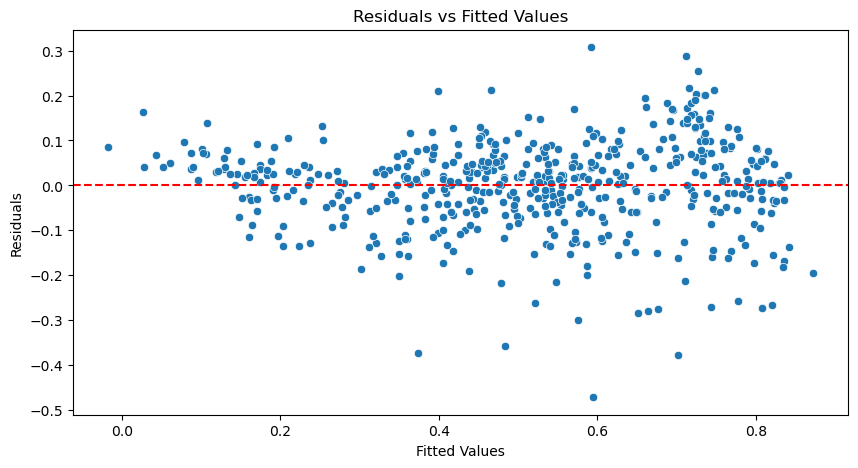

In [111]:
# plotting residuals
residuals = y_train - y_train_cnt

plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_train_cnt, y=residuals)
plt.axhline(0, color='red', linestyle='--') 
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

### Insight:
We can see that error terms are normally distributed,centered around 0 as per linear regression assumption.

In [113]:
X_train_rfe2

,const,yr,holiday,temp,windspeed,season_spring,season_winter,mnth_july,weathersit_C
653,1.0,1,0,0.509887,0.300794,0,1,0,0
576,1.0,1,0,0.815169,0.264686,0,0,1,0
426,1.0,1,0,0.442393,0.255342,1,0,0,0
728,1.0,1,0,0.245101,0.663106,1,0,0,0
482,1.0,1,0,0.395666,0.188475,0,0,0,0
...,...,...,...,...,...,...,...,...,...
526,1.0,1,0,0.824514,0.355596,0,0,0,0
578,1.0,1,0,0.863973,0.187140,0,0,0,0
53,1.0,0,0,0.202618,0.111379,1,0,0,0
350,1.0,0,0,0.248216,0.431816,0,1,0,0


#### Cross-verifying the error terms using a qq-plot as well:

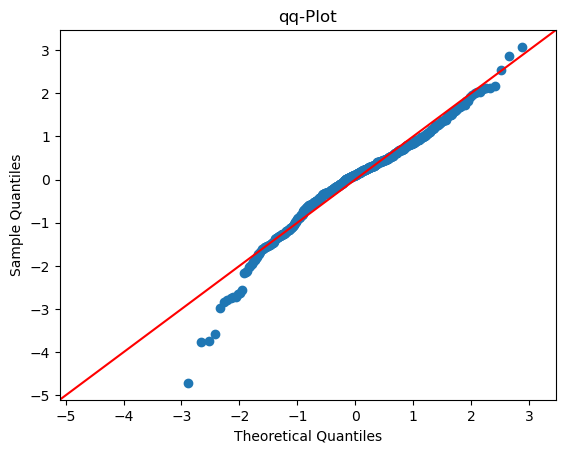

In [115]:
# Plot the qq-plot of the error terms

sm.qqplot((y_train - y_train_cnt), fit=True, line='45')
plt.title('qq-Plot')     
plt.show()

### Insight :
Here we see that most of the data points lie on the straight line , which indicates that the error terms are normally distributed .

### Making Predictions Using the Final Model with 6 features

In [118]:
# rescale for test data also
num_var

['temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

In [119]:
#df_test.shape

In [120]:
df_test[num_var] = scaler.transform(df_test[num_var])

#### Dividing into X_test and y_test

In [122]:
y_test = df_test.pop('cnt')
X_test = df_test.drop(["casual","registered"],axis=1)

In [123]:
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thur,weekday_tue,weekday_wed,weathersit_B,weathersit_C
184,0,1,0,0.831783,0.657364,0.084219,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
535,1,0,1,0.901354,0.610133,0.153728,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.837699,0.334206,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.314298,0.537414,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [124]:
# Let's check the list 'col2' which had the 6 variables RFE had selected
col1 = d.columns
col1

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_spring', 'season_winter',
       'mnth_july', 'weathersit_C'],
      dtype='object')

In [125]:
# Creating X_test_new dataframe by dropping variables from X_test
# Let's subset these columns and create a new dataframe 'X_test_rfe1'
X_test_rfe2 = X_test[col1]

In [126]:
# Add a constant to the test set created
X_test_rfe2 = sm.add_constant(X_test_rfe2)
X_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   const          219 non-null    float64
 1   yr             219 non-null    int64  
 2   holiday        219 non-null    int64  
 3   temp           219 non-null    float64
 4   windspeed      219 non-null    float64
 5   season_spring  219 non-null    int32  
 6   season_winter  219 non-null    int32  
 7   mnth_july      219 non-null    int32  
 8   weathersit_C   219 non-null    int32  
dtypes: float64(3), int32(4), int64(2)
memory usage: 13.7 KB


In [127]:
# making predictions
y_pred = lm4.predict(X_test_rfe2)#y_test_pred

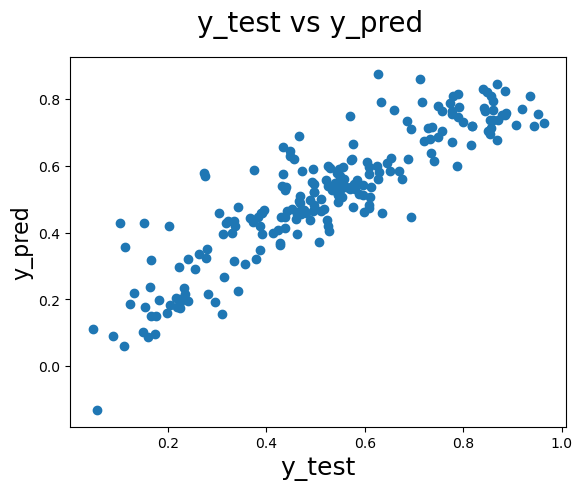

In [128]:
# Plot y_test and y_pred 
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)             
plt.xlabel('y_test', fontsize = 18)                         
plt.ylabel('y_pred', fontsize = 16)  
plt.show()

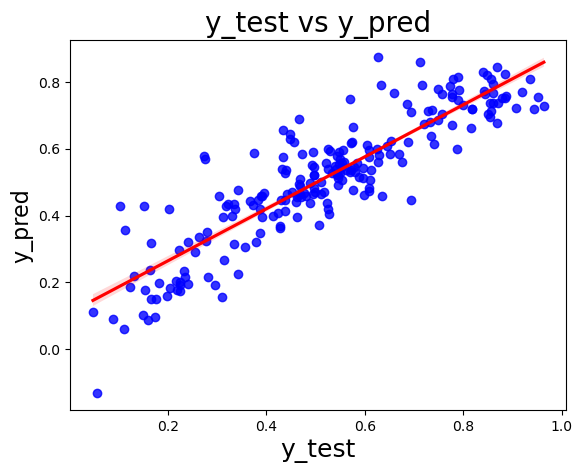

In [129]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

In [130]:
# r2_score for test data
r2_test = r2_score(y_test, y_pred)
r2_test

0.787846218596671

In [131]:
r2_train = r2_score(y_train, y_train_cnt)
r2_train

0.8013181013469184

In [132]:
# Checking the difference between the test-train r2 score 
abs((r2_test-r2_train))

0.013471882750247355

In [133]:
from sklearn.metrics import mean_squared_error,r2_score
mse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Mean Squared Error',round(mse,3))

Mean Squared Error 0.1


In [134]:
lm4.params.to_frame()

,0
const,0.203819
yr,0.234479
holiday,-0.081232
temp,0.490781
windspeed,-0.139873
season_spring,-0.104560
season_winter,0.049517
mnth_july,-0.072086
weathersit_C,-0.252097


### Insight:
For the model with **8 variables**, the R-squared values are  80.1 % for the training data and 78.78 % for the test data. The adjusted R-squared on the training set is around 79.8 %.

###  correlations between the final predictor features

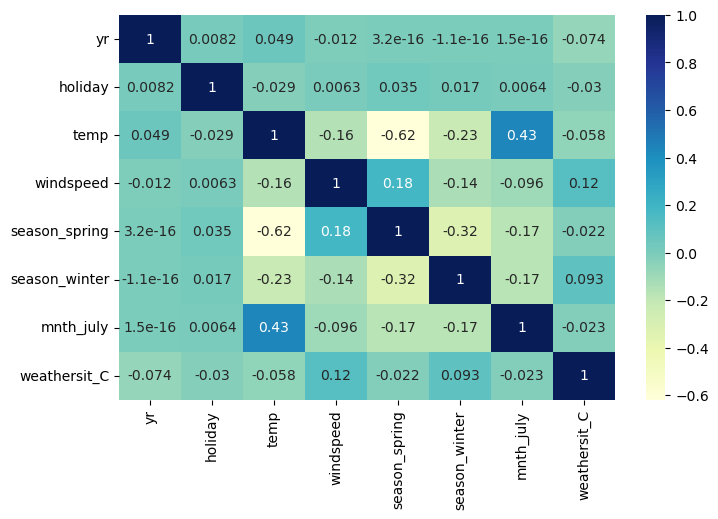

In [137]:
plt.figure(figsize=(8,5))
sns.heatmap(df_bike[col1].corr(), cmap="YlGnBu", annot=True)
plt.show()

### Conclusion:

The model with **8 variables** performs well with 80.1 % R-squared on the training data and 78.78 % on the test data. The slight drop in performance
between the two sets suggests good generalization, and the adjusted R-squared value of 79.8 % on the training set indicates that the model is
efficiently capturing the variance without being overly complex. This makes the model suitable for practical application.
rsit_C


#### The 8 predictor variables which contribute in predictions are:
1. yr
2. weathersit_C
3. temp
4. windspeed
5. season_spring
6. season_winter
7. mnth_july
8. holiday

### Top 3 Predictor Variables:

1.  **temp** (cof:0.490781) has the highest positive coefficient. This means that for each unit increase in temperature, the dependent variable is expected to increase by approximately 0.49.
2.  **weathersit_C** (cof :-0.252097) has the largest negative coefficient. This suggests that if the weather situation is classified as C, the dependent   variable is expected to decrease by about 0.25.
3.  **yr** (cof:0.234479) also has a positive relationship with the dependent variable, but with a lower magnitude than temp.
